Cats vs Dogs classifier examples with CNN based on the F. Chollet book
-------

### Preparing small dataset and dividing it into three parts: training, validation and test

### Data used must be downloaded from Kaggle dogs vs cats competition


In [1]:
import os, shutil

original_dataset_dir = '/Users/g0d/dev/data/DL2018/cats_dogs_full/train'

base_dir = '/Users/g0d/dev/data/DL2018/cats_dogs_small'
os.mkdir(base_dir)

# TRAIN, VALIDATION, TEST DIRECTORIES

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# CATS AND DOGS CLASSES TRAIN DIRS

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# CATS AND DOGS CLASSES VALIDATION DIRS

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# CATS AND DOGS CLASSES TEST DIRS

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# COPYING CATS

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# DOGS

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


### Total files count

In [35]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)),"\n")

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)),"\n")

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))



total training cat images: 1000
total training dog images: 1000 

total validation cat images: 500
total validation dog images: 500 

total test cat images: 500
total test dog images: 500


### BUILDING THE NETWORK

In [8]:
from keras import models, layers, optimizers

In [9]:
model = models.Sequential()

In [10]:
# LAYER 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

# LAYER 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# LAYER 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# LAYER 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# FLATTENING 128 channels to fit with the Dense output
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [11]:
model.output_shape

(None, 1)

### Lets inspect the overall structure of the model, along with the in/out structures sizes and parameter counts

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### We are going to feed the network with data stright from the directories with the help of ImageDataGenerator class, formatting them for the network on the fly

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# These return just a batch tensor, i.e. tensor shaped: (batch_size + sample.shape), e.g. (20, 150, 150, 3)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### A simple example how generators work in Python

In [14]:
def gen():
    i=0
    while True:
        i+=1
        yield i
    
for item in gen():
    print(item)
    if item > 4:
        break

1
2
3
4
5


### The generator output is just a batch shaped tensor - as it should be for the neural network to accept it

In [15]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape: ', data_batch.shape)
    print('labels_batch shape: ', labels_batch.shape)
    break

data_batch shape:  (20, 150, 150, 3)
labels_batch shape:  (20,)


### We will store training history for later convenience

In [16]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('cat_vs_dog.log', separator=',', append=False)

In [17]:
import time
start_time = time.time()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[csv_logger])

print("--- Total %s seconds ---" % (time.time() - start_time))



Epoch 1/30
100/100 [==============================] - 46s 456ms/step - loss: 0.6937 - acc: 0.5215 - val_loss: 0.6780 - val_acc: 0.6310
Epoch 2/30
100/100 [==============================] - 45s 450ms/step - loss: 0.6631 - acc: 0.6070 - val_loss: 0.6537 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 45s 450ms/step - loss: 0.6210 - acc: 0.6575 - val_loss: 0.6463 - val_acc: 0.6170
Epoch 4/30
100/100 [==============================] - 45s 452ms/step - loss: 0.5638 - acc: 0.7060 - val_loss: 0.7650 - val_acc: 0.5710
Epoch 5/30
100/100 [==============================] - 45s 450ms/step - loss: 0.5319 - acc: 0.7425 - val_loss: 0.5922 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 45s 451ms/step - loss: 0.4915 - acc: 0.7640 - val_loss: 0.5583 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 45s 453ms/step - loss: 0.4668 - acc: 0.7835 - val_loss: 0.5493 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 4

In [18]:
# Store the model for later use (and save 7000 seconds of training)
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# Loading the model for evaluation
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')

from keras.preprocessing.image import ImageDataGenerator

# No augmentation for test/validation data
test_datagen = ImageDataGenerator(
    rescale = 1./255,)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )


In [27]:
val_loss, val_acc = model.evaluate_generator(validation_generator),
val_loss, val_acc

### The history can be recovered with the aid of pandas

In [20]:
import pandas as pd
log_data = pd.read_csv('cat_vs_dog.log', sep=',', engine='python')

In [23]:
log_data['acc'].shape

(30,)

In [24]:
acc = log_data['acc']
val_acc = log_data['val_acc']
loss = log_data['loss']
val_loss = log_data['val_loss']
epochs = range(1, len(acc)+1)

### Conventional handling of the training history is via the retured history object and its embedded dictionary

In [ ]:
history.history.keys()

In [ ]:
hist = history.history
acc = hist['acc']
val_acc = hist['val_acc']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = range(1, len(acc)+1)

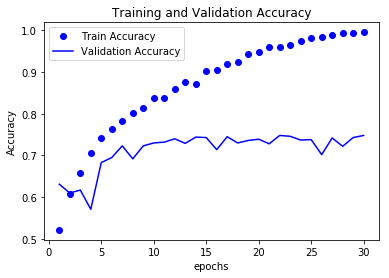

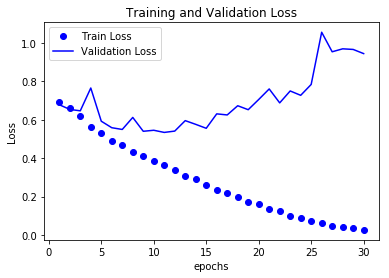

In [26]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Train Accuracy' )
plt.plot(epochs, val_acc,'b', label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss,'b',  label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


### The small dataset leads to severe overfitting. To fight this we employ ImageDatasetGenerator geometric on the fly transformations and augment the dataset

### Moving to Dataset Augmentation 

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:
# DATASET AUGMENTATION

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [44]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))



### A sample picture to show augmentation effects

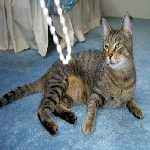

In [45]:
img

In [46]:
x = image.img_to_array(img)

x = x.reshape((1,)+x.shape)

In [47]:
x.shape

(1, 150, 150, 3)

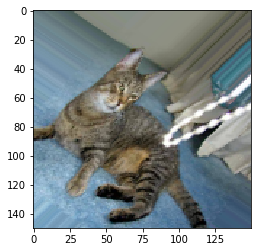

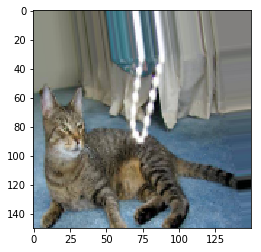

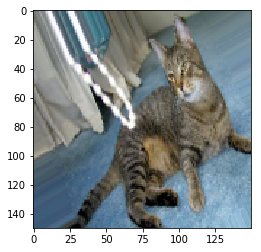

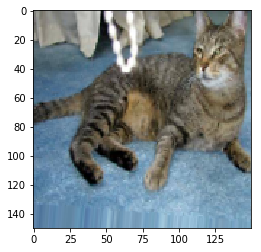

In [48]:
i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 ==0:
        break

plt.show()

### Defining two generators for augmented training and (non-augmented) validation

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)


# No augmentation for test/validation data
test_datagen = ImageDataGenerator(
    rescale = 1./255,)


# AUGMENTATIONS FROM THE ABOVE DEFINITION
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Let us build the network, which will be trained using data augmentation generator 

In [11]:
# Data augmented model with Dropout

# BUILDING THE NETWORK
from keras import models, layers, optimizers

model = models.Sequential()

# LAYER 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

# LAYER 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# LAYER 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# LAYER 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# FLATTENING 128 channels to fit with the Dense output
model.add(layers.Flatten())

# ADDING DROPOUT LAYER
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])


In [14]:
# NETWORK STRUCTURE GRAPH

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cats_dogs_model_plot.png', show_shapes=True, show_layer_names=True)

### Lets define again a custom callback saving traning history for later use

In [6]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('augmented_cat_vs_dog.log', separator=',', append=False)

In [38]:
# AUGMENTED DATASET TRAINING

start_time = time.time()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[csv_logger])

print("--- Total %s seconds ---" % (time.time() - start_time))




Epoch 1/100
100/100 [==============================] - 69s 687ms/step - loss: 0.6917 - acc: 0.5284 - val_loss: 0.6813 - val_acc: 0.5704
Epoch 2/100
100/100 [==============================] - 67s 669ms/step - loss: 0.6822 - acc: 0.5587 - val_loss: 0.6778 - val_acc: 0.5696
Epoch 3/100
100/100 [==============================] - 69s 688ms/step - loss: 0.6686 - acc: 0.5891 - val_loss: 0.6558 - val_acc: 0.5920
Epoch 4/100
100/100 [==============================] - 68s 683ms/step - loss: 0.6510 - acc: 0.6159 - val_loss: 0.6507 - val_acc: 0.6044
Epoch 5/100
100/100 [==============================] - 68s 680ms/step - loss: 0.6331 - acc: 0.6412 - val_loss: 0.6029 - val_acc: 0.6808
Epoch 6/100
100/100 [==============================] - 70s 699ms/step - loss: 0.6219 - acc: 0.6516 - val_loss: 0.6084 - val_acc: 0.6534
Epoch 7/100
100/100 [==============================] - 70s 699ms/step - loss: 0.6169 - acc: 0.6581 - val_loss: 0.5755 - val_acc: 0.7094
Epoch 8/100
100/100 [===========================


### The final score of the data augmented model: VAL_ACC == 0.8067


### Training took 7000 seconds - we shall save it for later use

In [39]:
# Store the model for later use (and save 7000 seconds of training)
model.save('cats_and_dogs_small_2.h5')

### Now load and evaluate the stored model

In [2]:
# Loading the model for evaluation
from keras.models import load_model

Using TensorFlow backend.


In [3]:
model = load_model('cats_and_dogs_small_2.h5')

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# No augmentation for test/validation data
test_datagen = ImageDataGenerator(
    rescale = 1./255,)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )



Found 1000 images belonging to 2 classes.


In [5]:
model.evaluate_generator(validation_generator)

[0.4540231261253357, 0.809]